# Supervised Learning: Regression

## Polynomial Regression

---

## Introduction¶

In the previous experiments,you may have gotten a good understanding of linear regression. After mastering the $unary$ and $multiple$ forms of linear regression, we can make regression predictions for some data with linear distribution trends. However, there are often data in the life that are not so "linear", such as fluctuations in the stock market, traffic flow etc. How to process this kind of non-linearly distributed data? Methods for the same will be described in this experiment.

### Key Points

- Polynomial
- Polynomial fitting
- Least squares method
- Overfitting
- Dataset partition
- Selection of optimal model
- `scikit-learn` implementations of polynomial regression prediction

---

## Introduction to Polynomial Regression

In linear regression, we fit the data by establishing a linear equation of an independent variable $x$. While in non-linear regression, it is necessary to establish a non-linear relationship between independent variable and dependent variable. Intuitively, the straight line that fits the data becomes a "curve".

As shown in the figure below, the points are from the change data of the population in a certain area. If we use linear variance to fit the data, then there is a "visually visible" error. For such a data distribution, using a curve to fit is much more suitable.

For non-linear regression problems, the simplest and most common method is the "polynomial regression", to be explained in this experiment. The polynomial is an early learning concept. We cite its definition by [Wikipedia](https://en.wikipedia.org/wiki/Polynomial) as follows:

>*In mathematics, a polynomial is an expression consisting of variables (also called indeterminates) and coefficients, that involves only the operations of addition, subtraction and multiplication, and non-negative integer exponents of variables. An example of a polynomial of a single indeterminate $x$ is $x^2-3x+4$. An example in three variables is $x^3-2xyz^2+2yz+1$.*

##  Polynomial Regression Basics

First, we use a set of sample data to understand polynomial regression:

In [1]:
# Load sample data
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

There are total ten sets of sample data, corresponding to abscissa and ordinate. We then draw the data through Matplotlib and show its trends:

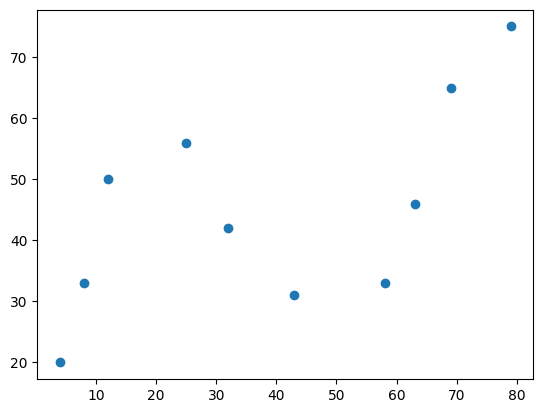

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.scatter(x, y)

### Quadratic Polynomial Fitting

The above scatter data needs to be fitted by a polynomial. To achieve this, a standard unary high-degree polynomial function like the following one is required:

$$ y(x, w) = w_0 + w_1x + w_2x^2 +...+w_mx^m = \sum\limits_{j=0}^{m}w_jx^j \tag{1} $$

Where $m$ represents the order of the polynomial and $x^j$ expresses $x$ raised to the power $j$. $w$ is the coefficient of the polynomial.

When we use the above polynomial to fit the scatter, two elements need to be determined, namely the polynomial coefficient $w$ and the polynomial degree $m$, which are also the two basic elements of any polynomial.

If the value of the polynomial degree $m$ is manually specified, then we only need to determine what the polynomial coefficient $w$ is. For example, assume $m=2$ here. Then the polynomial becomes:
$$ y(x, w) = w_0 + w_1x + w_2x^2= \sum\limits_{j=0}^{2}w_jx^j \tag{2} $$

When we determine the value of $w$, we return to what we learned in the previous linear regression experiments.

First, we construct two functions: a polynomial function for fitting and a loss function for training:

In [3]:
"""Define a quadratic polynomial function and a loss function
"""
def func(p, x):
    """Define a quadratic polynomial function
    """
    w0, w1, w2 = p
    f = w0 + w1*x + w2*x*x
    return f

def err_func(p, x, y):
    """Define a loss function
    """
    ret = func(p, x) - y
    return ret

Next, we simply initialize three $w$ parameters using the random number method provided by NumPy.

In [4]:
import numpy as np

p_init = np.random.randn(3) # Generate 3 random numbers

p_init

array([-0.24045316, -1.98945936,  0.05624281])

Next is the process of solving for the optimal parameters using the least squares method. For convenience, we use the least squares class provided by SciPy to get the best fitting parameters. Of course, you can solve for the parameters yourself by the least squares formula in the **"Linear Regression"** chapter. However, in practice, in order to achieve results quickly, you will often use a ready-made function library like **SciPy**. Let us introduce a method here:

In [5]:
"""Use the least squares function provided by SciPy
"""
from scipy.optimize import leastsq

parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))

print('Fitting Parameters: ', parameters[0])

Fitting Parameters:  [ 3.76893113e+01 -2.60474106e-01  8.00078030e-03]


The best fitting parameters $w_0$, $w_1$ and $w_2$ we get here are `3.76893117e+01`, `-2.60474147e-01` and `8.00078082e-03`. That is, our fitted function (retaining two significant digits) is:

$$ y(x) = 37 - 0.26*x + 0.0080*x^2 \tag{3} $$

Then we try to draw the fitted figure:

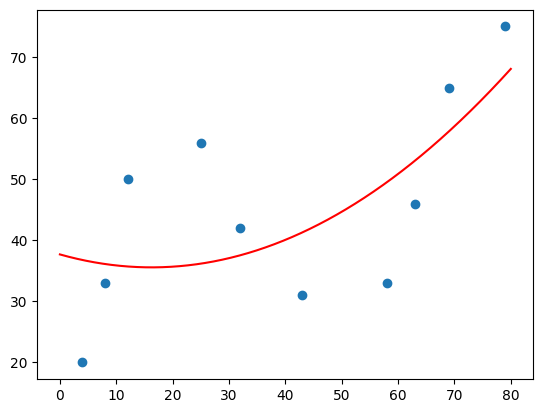

In [6]:
"""Draw the fitted figure
"""
# Generate the testing points
x_temp = np.linspace(0, 80, 10000)

# Draw the fitted curve
plt.plot(x_temp, func(parameters[0], x_temp), 'r')

# Draw the original scatters
plt.scatter(x, y)

# ### N-Degree Polynomial Fitting

You will find that the results of the second-degree polynomial do not properly reflect the trend of the scatter. At this point, we try a polynomial fit of third degree or higher. In the following part, we slightly modify the code to implement an N-degree polynomial fitting:

In [7]:
"""N-degree Polynomial Fitting
"""
def fit_func(p, x):
    """Define an N-degree polynomial function
    """
    f = np.poly1d(p)
    return f(x)

def err_func(p, x, y):
    """Define a loss function
    """
    ret = fit_func(p, x) - y
    return ret

def n_poly(n):
    """N-degree polynomial fitting
    """
    p_init = np.random.randn(n) # Generate N random numbers
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]

You can use $n=3$ to verify whether the above code is available:

In [8]:
n_poly(3)

array([ 8.00077993e-03, -2.60474072e-01,  3.76893108e+01])

The result obtained at this time is consistent with the result of the formula (3), but the order is different. This is because the default mode of the polynomial function `np.poly1d(3)` in NumPy is:

$$ y(x) = 0.0080*x^2 - 0.26*x + 37\tag{4} $$

Now, we plot the fitting result of the `4-`, `5-`, `6-`, `7-` and `8-` `degree` polynomials:

Text(0.5, 1.0, 'm = 9')

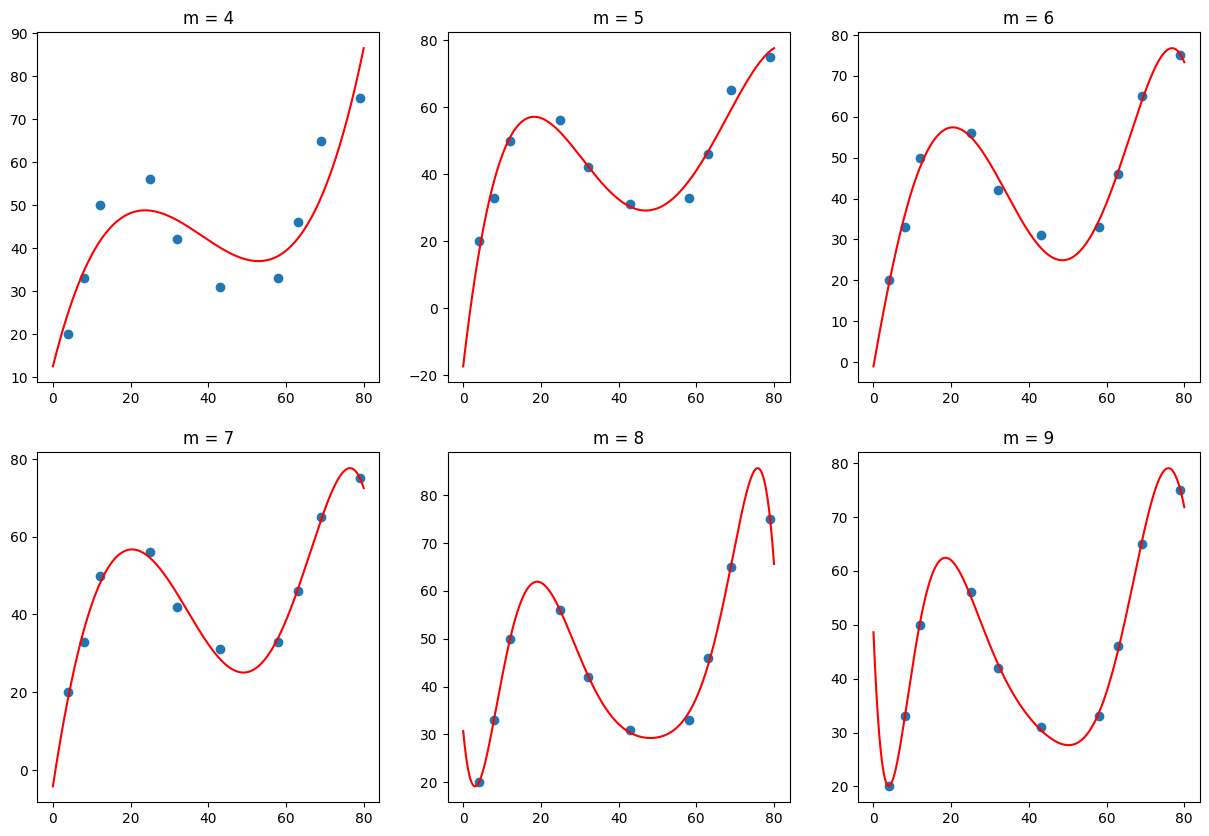

In [9]:
"""Plot the fitting result of the 4-, 5-, 6-, 7- and 8- degree polynomials
"""

# Generate the testing points
x_temp = np.linspace(0, 80, 10000)

# Generate the sub-images
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0,0].plot(x_temp, fit_func(n_poly(4), x_temp), 'r')
axes[0,0].scatter(x, y)
axes[0,0].set_title("m = 4")

axes[0,1].plot(x_temp, fit_func(n_poly(5), x_temp), 'r')
axes[0,1].scatter(x, y)
axes[0,1].set_title("m = 5")

axes[0,2].plot(x_temp, fit_func(n_poly(6), x_temp), 'r')
axes[0,2].scatter(x, y)
axes[0,2].set_title("m = 6")

axes[1,0].plot(x_temp, fit_func(n_poly(7), x_temp), 'r')
axes[1,0].scatter(x, y)
axes[1,0].set_title("m = 7")

axes[1,1].plot(x_temp, fit_func(n_poly(8), x_temp), 'r')
axes[1,1].scatter(x, y)
axes[1,1].set_title("m = 8")

axes[1,2].plot(x_temp, fit_func(n_poly(9), x_temp), 'r')
axes[1,2].scatter(x, y)
axes[1,2].set_title("m = 9")

As can be seen from the above six figures, when $m=4$ (4th degree polynomial), the fitting result is significantly better than that of $m=3$. However, as the value of $m$ increases to $8$, the curve shows a significant oscillation, which is the overfitting phenomenon mentioned in the linear regression experiment.

### Polynomial Fitting with `scikit-learn`

Above we have defined the polynomial and implemented the polynomial regression fitting process on our own. In addition, we can also use the polynomial regression method provided by `scikit-learn`. Here, we will use the `sklearn.preprocessing.PolynomialFeatures()` class. The main use of `PolynomialFeatures()` is to generate a polynomial feature matrix. **If you are new to this concept, you may need to read the following carefully:**

For a quadratic polynomial, we know its standard form is: $y(x, w) = w_0 + w_1x + w_2x^2$. However, polynomial regression is equivalent to a special form of linear regression indeed. For example, here we set $x = x_1$ and $x^2 = x_2$. Then the original equation is converted to: $y(x, w) = w_0 + w_1*x_1 + w_2*x_2$, that is, multiple linear regression. This achieves **the conversion between a unary high-degree polynomial to a multivariate one-time polynomial**.

For example, for the independent variable vector $X$ and the dependent variable $y$, if we have $X$ as:

$$ \mathbf{X} = \begin{bmatrix}
       2    \\[0.3em]
       -1 \\[0.3em]
       3
     \end{bmatrix} \tag{5a}$$

We can fit it through the $y = w_1 x + w_0$ linear regression model. Similarly, for a quadratic polynomial $y(x, w) = w_0 + w_1x + w_2x^2$, if you can get the feature matrix composed of $x = x_1$, $x^2 = x_2$, namely:

$$\mathbf{X} = \left [ X, X^2 \right ] = \begin{bmatrix}
 2& 4\\ -1
 & 1\\ 3
 & 9
\end{bmatrix}
\tag{5b}$$

Then you can fit it through linear regression.

Actually you can manually verify the above results, but what needs to be kept in mind is— **When the polynomial is of high degree, the expression as well as the calculation of the feature matrix will become much more complicated.** For example, the following is a feature matrix expression for a binary quadratic polynomial:

$$\mathbf{X} = \left [ X_{1}, X_{2}, X_{1}^2, X_{1}X_{2}, X_{2}^2 \right ]
\tag{5c}$$

Fortunately, in `scikit-learn`, we can automatically generate a polynomial feature matrix through the `PolynomialFeatures()` class. The default parameters and the common parameters of the `PolynomialFeatures()` class are defined as follows:

```python
sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
```
- `degree`: 2 by default. The degree of the polynomial features.
- `interaction_only`: False by default. If True, only interaction features are produced.
- `include_bias`: If True (default), then include a bias column.

Corresponding to the above eigen vectors, the main use of `PolynomialFeatures()` is to generate a feature matrix as shown below:

In [10]:
"""Use PolynomialFeatures() to generate a feature matrix
"""
from sklearn.preprocessing import PolynomialFeatures

X=[2, -1, 3]
X_reshape = np.array(X).reshape(len(X), 1) # Transpose
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_reshape)

array([[ 2.,  4.],
       [-1.,  1.],
       [ 3.,  9.]])

For the matrix in the upper cell, the first column is $X^1$ and the second one is $X^2$. Then we use the polynomial function $y(x, w) = w_0 + w_1*x_1 + w_2*x_2$ to fit the data.

<div style="color: #999;font-size: 12px;font-style: italic;">*Note: In this lesson, you will see a lot of `reshape` operations, all of which are designed to satisfy the array shape of some class-passed arguments. These operations are necessary in this experiment because the original shape of the data (such as the one-dimensional array above) may not be passed directly to some specific class. But it's not necessary in practice because the raw dataset shape at your hand may support direct input. So, don't be afraid of these `reshape` operations.</div>

Going back to the sample data in *Section 2.1*, the independent variable is $x$ and the dependent variable is $y$. If a quadratic polynomial is adopted, then we use `PolynomialFeatures()` to generate the feature matrix.

In [11]:
"""Use sklearn to generate the feature matrix of a quadratic polynomial
"""
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(len(x), 1) # Transpose
y = np.array(y).reshape(len(y), 1)


poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_features.fit_transform(x)

poly_x

array([[4.000e+00, 1.600e+01],
       [8.000e+00, 6.400e+01],
       [1.200e+01, 1.440e+02],
       [2.500e+01, 6.250e+02],
       [3.200e+01, 1.024e+03],
       [4.300e+01, 1.849e+03],
       [5.800e+01, 3.364e+03],
       [6.300e+01, 3.969e+03],
       [6.900e+01, 4.761e+03],
       [7.900e+01, 6.241e+03]])

Then we train the linear regression model with `scikit-learn`. The `LinearRegression()` class will be used here. The default parameters and the common parameters of the `LinearRegression()` class are defined as follows:

```python
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
```
- `fit_intercept`: True by default. Whether to calculate the intercept for this model.
- `normalize`: False by default. If True, the regressors will be normalized before regression by subtracting the mean and dividing by the l2-norm.
- `copy_X`: If True (default), X will be copied; else it may be overwritten.
- `n_jobs`: The number of jobs to use for the computation (1 by default). If -1, all CPU cores are used.

In [13]:
"""Convert to linear regression predictions
"""
from sklearn.linear_model import LinearRegression

# Define linear regression model
model = LinearRegression()
model.fit(poly_x, y)

# Obtain the linear regression parameters
model.intercept_, model.coef_

(array([37.68931083]), array([[-0.26047408,  0.00800078]]))

You will find that the parameter values obtained here are consistent with equations (3) and (4). To be more intuitive, the fitted figure is also drawn here:

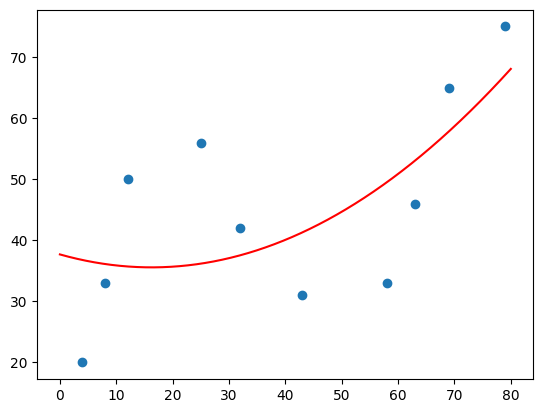

In [14]:
"""Plot the fitted figure
"""
x_temp = np.array(x_temp).reshape(len(x_temp),1)
poly_x_temp = poly_features.fit_transform(x_temp)

plt.plot(x_temp, model.predict(poly_x_temp), 'r')
plt.scatter(x, y)

Does this figure seem familiar? In fact, it is consistent with the figure below for equation (3).

##  Predictions Using Polynomial Regression

Above we learned how to use polynomials to fit the data. Now we will introduce how to use polynomial regression to solve practical prediction problems. In this forecasting experiment, we will use the *World Measles Vaccination Rate* dataset provided by the World Health Organization and UNICEF. The goal is to predict the measles vaccination rate for the corresponding year.

### To Load and Preview the Dataset

First we import the *World Measles Vaccination Rate* dataset. The dataset name is: `course-6-vaccine.csv`.

In [16]:
from urllib.request import urlretrieve

url = "http://labfile.oss.aliyuncs.com/courses/1081/course-6-vaccine.csv"
dest = "course-6-vaccine.csv"
urlretrieve(url, dest)  # скачает файл рядом с ноутбуком


('course-6-vaccine.csv', <http.client.HTTPMessage at 0x16c3a4140>)

In [17]:
"""Load the dataset and preview
"""
import pandas as pd

df = pd.read_csv("course-6-vaccine.csv", header=0)
df

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892
5,1988,62.710162
6,1989,68.354736
7,1990,73.618808
8,1991,69.748838
9,1992,69.905091


As you can see, the dataset consists of two columns where `Year` represents year and `Values` represents the corresponding world measles vaccination rate, and only the numerical portion of the percentage is taken here. We plot the data into charts to see the trends:

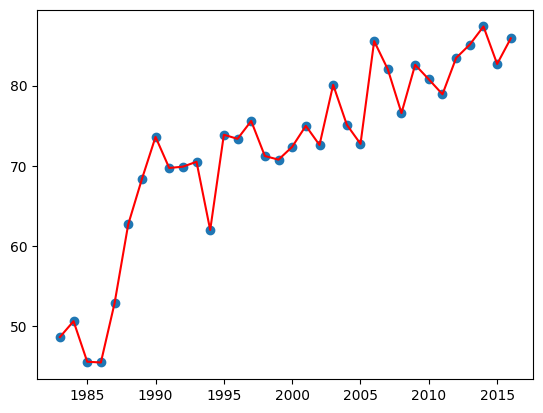

In [18]:
"""Plot
"""
# Define x and y
x = df['Year']
y = df['Values']
# Plot
plt.plot(x, y, 'r')
plt.scatter(x, y)

For the trend shown in the above figure, we might think that polynomial regression is better than linear regression. Is this the case? Let's try it.

### Comparison: Linear Regression and Quadratic Polynomial Regression

According to what was learned in the linear regression course, in machine learning tasks we generally divide the dataset into training sets and test sets. So, here 70% of the data is considered the training sets and the rest 30% is classified as the test sets. Code is shown below:

In [19]:
"""Data partition
"""
# Divide dataframe into training set and testing set
train_df = df[:int(len(df)*0.7)]
test_df = df[int(len(df)*0.7):]

# Define x and y for training and testing, respectively
train_x = train_df['Year'].values
train_y = train_df['Values'].values

test_x = test_df['Year'].values
test_y = test_df['Values'].values

Next, we use the polynomial regression prediction method provided by `scikit-learn` to train the model. First let's solve the above problem: **Is polynomial regression better than linear regression?**

To begin with, we train the linear regression model and make predictions:

In [20]:
"""Linear regression predictions
"""
# Implement linear regression model
model = LinearRegression()
model.fit(train_x.reshape(len(train_x),1), train_y.reshape(len(train_y),1))
results = model.predict(test_x.reshape(len(test_x),1))
results # testing result

array([[81.83437635],
       [83.09935437],
       [84.36433239],
       [85.62931041],
       [86.89428843],
       [88.15926645],
       [89.42424447],
       [90.68922249],
       [91.95420051],
       [93.21917853],
       [94.48415655]])

With the predictions, we can compare them to the ground truth. Here we use two indicators: mean absolute error (MAE) and mean squared error (MSE). If you are still not familiar with these two indicators, see their definitions below:

The **mean absolute error (MAE)** is the average of absolute errors. It can be calculated as follows:
\begin{equation}
\textrm{MAE}(y, \hat{y} ) = \frac{1}{n}\sum_{i=1}^{n}{|y_{i}-\hat y_{i}|}\tag{6}
\end{equation}
Where $y_{i}$ represents the true value, $\hat y_{i}$ represents the predicted value and $n$ represents the number of values. Smaller the value of MAE, the better the accuracy of the predictive model. We can implement the MAE calculation function in Python.

**Mean Squared Error (MSE)** represents the expected value of the square of the error. Its calculation formula is as follows:
\begin{equation}
\textrm{MSE}(y, \hat{y} ) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^{2}\tag{7}
\end{equation}
Where $y_{i}$ represents the true value, $\hat y_{i}$ represents the predicted value and $n$ represents the number of values. Smaller the value of MSE, the better the accuracy of the predictive model. Also, we can implement the MAE calculation function in Python.

Here, we use the MAE and MSE provided by `scikit-learn` directly:

In [21]:
"""Errors of linear regression
"""

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE of linear regression: ", mean_absolute_error(test_y, results.flatten()))
print("MSE of linear regression: ", mean_squared_error(test_y, results.flatten()))

MAE of linear regression:  6.011979515629812
MSE of linear regression:  43.531858295153434


Next, we can start training the quadratic polynomial regression model and make predictions:

In [22]:
"""Quadratic polynomial predictions
"""
# Generate the feature matrix
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_train_x_2 = poly_features_2.fit_transform(train_x.reshape(len(train_x),1))
poly_test_x_2 = poly_features_2.fit_transform(test_x.reshape(len(test_x),1))

# Training and predicting
model = LinearRegression()
model.fit(poly_train_x_2, train_y.reshape(len(train_x),1)) # Train the model

results_2 = model.predict(poly_test_x_2) # Prediction

results_2.flatten() # Print after flattening

array([71.98010746, 70.78151826, 69.38584368, 67.79308372, 66.00323838,
       64.01630767, 61.83229158, 59.45119011, 56.87300326, 54.09773104,
       51.12537344])

In [23]:
"""Errors of quadratic polynomial regression
"""
print("MAE of quadratic polynomial regression: ", mean_absolute_error(test_y, results_2.flatten()))
print("MSE of quadratic polynomial regression: ", mean_squared_error(test_y, results_2.flatten()))

MAE of quadratic polynomial regression:  19.792070829604697
MSE of quadratic polynomial regression:  464.3290384764974


Based on the above definitions of MAE and MSE, you now know that smaller the two values, the higher the prediction accuracy of the model. In other words, the prediction results of the linear regression model are better than those of the quadratic polynomial regression model.

### Polynomial Regression Predictions with Higher Degrees

Actually, this situation is very common. But this does not mean that the polynomial regression will always be worse than linear regression. Next let's try the results of the `3-`, `4-` and `5-` `degree` polynomial regressions. To simplify the process, we reconstructed the code and got the predicted results for three simulations at one time.

By instantiating the `make_pipeline` pipeline class, all predictors can call `fit` and `predict` instructions. `make_pipeline` is a technique innovation of `sklearn`, and no more details will be introduced here. We just imitate the official [tutorials](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) to simple use:

In [24]:
"""Polynomial regression predictions with higher degrees
"""
from sklearn.pipeline import make_pipeline

train_x = train_x.reshape(len(train_x),1)
test_x = test_x.reshape(len(test_x),1)
train_y = train_y.reshape(len(train_y),1)

for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(train_x, train_y)
    pre_y = model.predict(test_x)
    print("{}-degree polynomial regression_MAE: ".format(m), mean_absolute_error(test_y, pre_y.flatten()))
    print("{}-degree polynomial regression_MSE: ".format(m), mean_squared_error(test_y, pre_y.flatten()))
    print("---")

3-degree polynomial regression_MAE:  4.547692030339024
3-degree polynomial regression_MSE:  29.93305740662007
---
4-degree polynomial regression_MAE:  4.426255978790289
4-degree polynomial regression_MSE:  29.048982559773833
---
5-degree polynomial regression_MAE:  4.341615905708303
5-degree polynomial regression_MSE:  28.22192298926822
---


From the above results, it can be concluded that the results of the `3-`, `4-` and `5-` `degree` polynomial regressions are better than those of the linear regression model. Therefore, polynomial regression still has its superiority.

### The Optimal Degree in Polynomial Regression Case

Up to now, you may have a question: In the process of selecting a polynomial for regression prediction, **what degree is optimal?**

For the above question, the answer is simple. We can choose an error indicator. For example, if you select MSE here, then we can calculate the errors with different degrees. Just have a try:

MSE results:  [43.531858295153434, 464.3290384764974, 29.93305740662007, 29.048982559773833, 28.22192298926822, 27.440821659132077, 26.71232004764694, 26.038729575802815, 25.422418045289476, 24.86581839050124]


Text(0, 0.5, 'MSE')

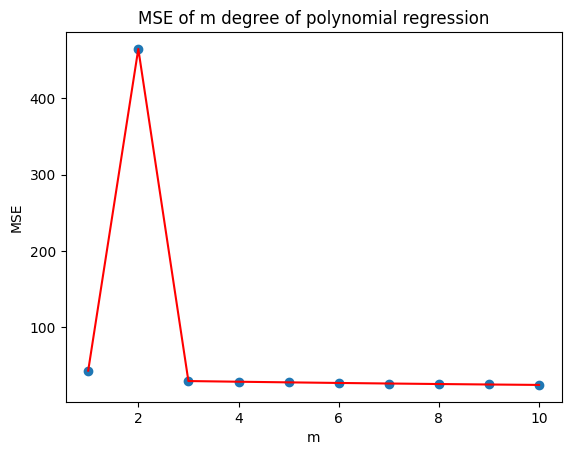

In [25]:
"""Calculate MSE results of m-degree polynomial regression and plot
"""
mse = [] # Save MSE for different degrees
m = 1 # Start from 1-degree
m_max = 10 # Set the highest degree to be tested
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(train_x, train_y) # Train
    pre_y = model.predict(test_x) # Test
    mse.append(mean_squared_error(test_y, pre_y.flatten())) # Calculate MSE
    m = m + 1

print("MSE results: ", mse)
# Plot
plt.plot([i for i in range(1, m_max + 1)], mse, 'r')
plt.scatter([i for i in range(1, m_max + 1)], mse)

# Descriptions
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")

As shown in the figure above, the MSE value reached its highest point in the 2nd degree polynomial regression prediction and then decreased rapidly. The results after the 3rd degree still showed a gradual decline, but they tended to be stable. In general, we also need to consider the generalization ability of the model and avoid overfitting. Here, we can choose the 3rd degree polynomial as the optimal regression prediction model.

## Summary

In this experiment, we learned what polynomial regression is, and the connections and differences between polynomial regression and linear regression. At the same time, the experiment explores the implementation of polynomial regression fitting and uses `scikit-learn` to construct a polynomial regression prediction model under a real dataset. The knowledge points involved in the experiment are:
- Polynomial
- Polynomial fitting
- Least squares method
- Overfitting
- Dataset partition
- Selection of optimal model
- `scikit-learn` implementations of polynomial regression prediction